<a href="https://colab.research.google.com/github/coulibalymoumouni/Python_seance/blob/main/TP_5_RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#importation des bibliothèques de travail
import pandas as pd

In [2]:
#importer les données et afficher les premières lignes
data_imdb = pd.read_csv('/content/2023_IMDB-Dataset.csv')
data_imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [21]:
#separer les données
X = data_imdb['review']
y = data_imdb['sentiment']

In [22]:
#separer les données en train et test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
#Tokeniser les textes en utilisant la fonction Tokenizer de tensorflow.keras.preprocessing.text
from tensorflow.keras.preprocessing.text import Tokenizer
vocab_size = 10000
oov_tok = "<OOV>"
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

In [24]:
#Préciser une longueur de séquence nominale de 200 pour chaque token. sequence_length = 200
from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen = 200

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen, padding='post', truncating='post')

X_test_seq = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen, padding='post', truncating='post')

y_train = y_train.map({'positive': 1, 'negative': 0}).values
y_test = y_test.map({'positive': 1, 'negative': 0}).values



In [26]:
#Construction du Modèle RNN basique
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
modelRNN = Sequential()
modelRNN.add(Embedding(input_dim=10000, output_dim=32, input_length=maxlen))
modelRNN.add(SimpleRNN(units=32))
modelRNN.add(Dense(units=1, activation='sigmoid'))

In [27]:
#Construction du Modèle LSTM
from tensorflow.keras.layers import LSTM
modelLSTM = Sequential()
modelLSTM.add(Embedding(input_dim=10000, output_dim=64, input_length=200))
#garde toute la sequence
modelLSTM.add(LSTM(64,return_sequences=True))
#Ccouche finale LSTM
modelLSTM.add(LSTM(32))
modelLSTM.add(Dense(16, activation='relu'))
modelLSTM.add(Dense(1, activation='sigmoid'))

In [35]:
#Compilation et Entraînement du Modèle
modelRNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modelLSTM.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

historyRNN = modelRNN.fit(X_train_pad, y_train, epochs=3, batch_size=64, validation_data=(X_test_pad, y_test))
historyLSTM = modelLSTM.fit(X_train_pad, y_train, epochs=3, batch_size=64, validation_data=(X_test_pad, y_test))



Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 50ms/step - accuracy: 0.8160 - loss: 0.3129 - val_accuracy: 0.5153 - val_loss: 1.3437
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 0.8419 - loss: 0.2840 - val_accuracy: 0.5068 - val_loss: 1.4601
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.8733 - loss: 0.2513 - val_accuracy: 0.5096 - val_loss: 1.5577
Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 157s 243ms/step - accuracy: 0.7672 - loss: 0.5120 - val_accuracy: 0.8044 - val_loss: 0.4410
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 191s 226ms/step - accuracy: 0.8068 - loss: 0.4345 - val_accuracy: 0.8228 - val_loss: 0.4046
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 155s 247ms/step - accuracy: 0.8447 - loss: 0.3653 - val_accuracy: 0.8390 - val_loss: 0.3800


In [36]:
#Évaluer la performance du modèle sur l'ensemble de test
#Evaluer la performance avec RNN
loss, accuracy = modelRNN.evaluate(X_test_pad, y_test)
print("RNN - Loss: ", loss)
print("RNN - Accuracy: ", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5103 - loss: 1.5578
RNN - Loss:  1.5577118396759033
RNN - Accuracy:  0.5095999836921692


In [37]:
#Evaluer la performance avec LSTM
loss, accuracy = modelLSTM.evaluate(X_test_pad, y_test)
print("LSTM - Loss: ", loss)
print("LSTM - Accuracy: ", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.8383 - loss: 0.3810
LSTM - Loss:  0.37995263934135437
LSTM - Accuracy:  0.8389999866485596


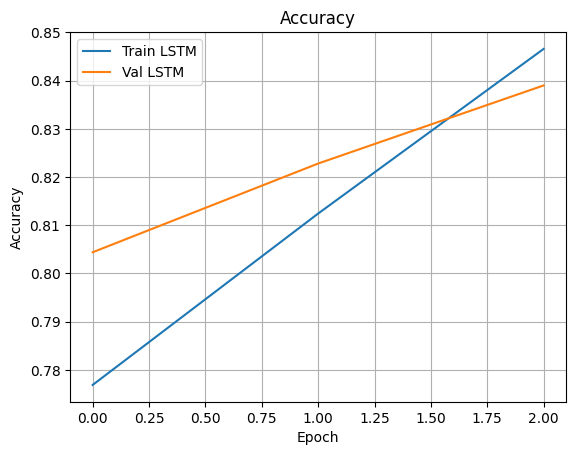

In [38]:
#Visualisation de la performance avec LSTM
import matplotlib.pyplot as plt
plt.plot(historyLSTM.history['accuracy'], label='Train LSTM')
plt.plot(historyLSTM.history['val_accuracy'], label='Val LSTM')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


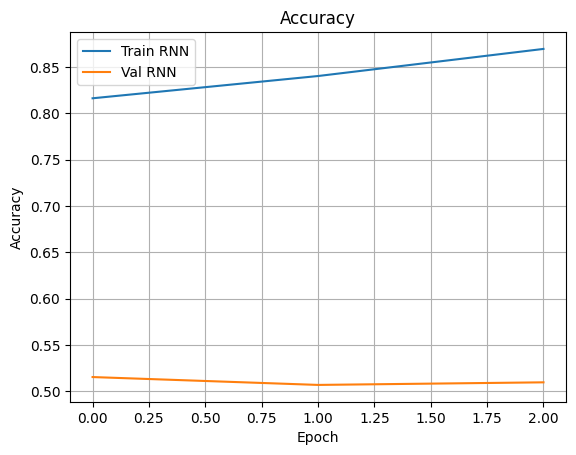

In [39]:
#Visualisation de la performance avec RNN
import matplotlib.pyplot as plt
plt.plot(historyRNN.history['accuracy'], label='Train RNN')
plt.plot(historyRNN.history['val_accuracy'], label='Val RNN')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
